## 개념 정리
### 용어 정리
- 말뭉치: 자언어 처리에서 사용하는 텍스트 데이터의 모음
- 토큰
    - 텍스트에서 공백으로 구분되는 문자열.
    - 종종 소문자로 변환하고 구둣점은 삭제함
    - 구분된 토큰을 정수로 매핑함. 일부 정수는 예약되어 있음.
      - 0은 Padding, 1은 문장의 시작, 2는 어휘사전에 없는 토큰을 나타냄.
- 어휘사전: 훈련셋에서 고유한 단어를 뽑아 만든 목록. 예를 들어, 테스트 셋 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 모델에 주입함.
- 원-핫 인코딩
    - 어떤 클래스에 해당하는 원소만 1이고 나머지는 0인 벡터
    - 정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘 사전 크기의 벡터가 만들어짐
- 단어 임베딩
    - 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환.
    - 이런 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘함.
    - 원-핫 인코딩보다 의미 있는 값이 채워져 있어, 크기도 적고 성능도 좋은 편.
    - Embedding 층을 통해 정수데이터를 임베딩 할 수 있음
### 핵심 패키자와 함수 (Tensorflow)
- pad_sequences()
    - 시퀸스 길이를 맞추기 위해 패딩을 추가. 이 함수는 (샘플 갯수, 타임스텝 개수) 크기의 2차원 배열을 기대함.
    - maxlen: 원하는 시퀸스 길이를 지정할 수 있음. 이 값보다 긴 시퀀스는 잘리고 짧은 시퀸스는 패딩됨. 기본값은 가장 긴 시퀸스의 길이
    - padding: 패딩을 추가할 위치를 지정. 기본값인 'pre'는 시퀸스 앞에 패딩을 추가하고, 'post'는 시퀸스 뒤에 패딩을 추가함.
    - truncating: 긴 시퀸스에서 잘라버릴 위치를 지정. 기본값인 'pre'는 시퀸스의 앞부분을 잘라내고, 'post'는 시퀸스 뒷부분을 잘라냄
- to_categorical()
    - 정수 시퀸스를 원-핫 인코딩으로 변환.
    - 토큰을 원-핫 인코딩하거나, 타깃값을 원-핫 인코딩할 때 사용함.
    - num_classes: 클래스 갯수를 지정. 지정하지 않으면 데이터에서 자동으로 찾음
- SimpleRNN
    - 케라스의 기본 순환층 클래스.
    - 첫번째 매개변수에 뉴런의 갯수를 지정.
    - activation: 활성화 함수를 지정. 기본값은 'tanh'
    - dropout: 입력에 대한 드롭아웃 비율을 지정할 수 있음
    - return_sequences: 모든 타임스텝의 은닉 상태를 출력할 지 결정. 기본값은 'False'
- Embedding
    - 단어 임베딩을 위한 클래스
    - 첫번째 매개변수에서 어휘 사전의 크기를 지정
    - 두번째 매개변수에서 Embedding 층이 출력할 밀집 벡터의 크기를 지정
    - input_length: 입력 시퀸스의 길이를 지정. Embedding 층 바로 뒤에, Flatten이나 Dense층이 올때 꼭 필요함.

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]
239.00925 178.0


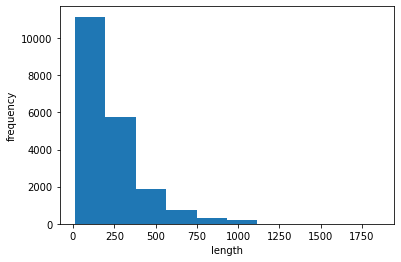

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
'''데이터 처리하기'''
# 데이터 가져오기
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 500개의 단어만 표현하고, 나머지는 2로 표시

# 훈련 세트와 테스트 세트의 크기를 확인
print(train_input.shape, test_input.shape)

# 첫번째 리뷰의 길이 측정
print(len(train_input[0]))
# 두번째 리뷰의 길이 측정
print(len(train_input[1]))
# 첫번째 리뷰 출력
print(train_input[0])
# Target 데이터 출력
print(train_target[:20]) # 0이면 부정, 1이면 긍정을 의미함.

# 훈련셋과 검증셋을 나누기
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

# 훈련셋의 길이의 평균값과 중간값을 구함
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths))

# 훈련셋의 길이 배열을 히스토그램으로 시각화
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

# 시퀀스 데이터의 길이 맞추가: train_input의 길이를 100으로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

# 시퀸스로 조정된 데이터 출력해보기
print(train_seq[0])
print(train_input[0][-10:])
print(train_seq[5])

val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
'''순환 신경망 만들기'''
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100,500))) # 500개의 단어에 대한 원-핫 인코딩을 적용하기 때문에, 배열의 길이가 500이여야 함.
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 원-핫 인코딩: 훈련셋
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh)
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

# 원-핫 인코딩: 검증셋
val_oh = keras.utils.to_categorical(val_seq)

# 모델 정보 요약
model.summary()

# 원-핫 인코딩된 데이터와 인코딩 전 데이터의 크기 측정
print((train_seq.nbytes/1024/1024), (train_oh.nbytes/1024/1024))

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]]
[0. 0. 0. 

Epoch 1/100
313/313 [==============================] - 15s 43ms/step - loss: 0.6976 - accuracy: 0.4992 - val_loss: 0.6967 - val_accuracy: 0.5010
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6914 - accuracy: 0.5272 - val_loss: 0.6912 - val_accuracy: 0.5318
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6849 - accuracy: 0.5617 - val_loss: 0.6843 - val_accuracy: 0.5638
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6782 - accuracy: 0.5949 - val_loss: 0.6781 - val_accuracy: 0.5944
Epoch 5/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6712 - accuracy: 0.6251 - val_loss: 0.6720 - val_accuracy: 0.6214
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6638 - accuracy: 0.6492 - val_loss: 0.6639 - val_accuracy: 0.6476
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6562 - accuracy: 0.6701 - val_loss: 0.6565 - val_ac

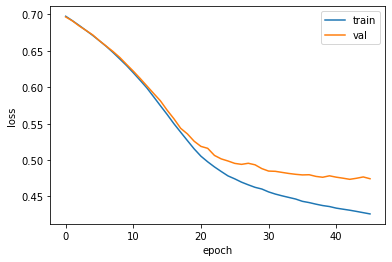

In [ ]:
'''순환 신경망 훈련하기'''
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb]) 
# 결과 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
'''단어 임베딩 사용한 모델 생성하기'''
# 각 단어를 실수값의 배열로 변환해 줌.
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))
# 생성한 모델 시각화
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6977 - accuracy: 0.5009 - val_loss: 0.6956 - val_accuracy: 0.5090
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6919 - accuracy: 0.5199 - val_loss: 0.6925 - val_accuracy: 0.5190
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6874 - accuracy: 0.5423 - val_loss: 0.6901 - val_accuracy: 0.5296
Epoch 4/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6832 - accuracy: 0.5619 - val_loss: 0.6882 - val_accuracy: 0.5400
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6790 - accuracy: 0.5753 - val_loss: 0.6864 - val_accuracy: 0.5516
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6744 - accuracy: 0.5911 - val_loss: 0.6843 - val_accuracy: 0.5516
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6696 - accuracy: 0.6022 - val_loss: 0.6821 - val_accuracy:

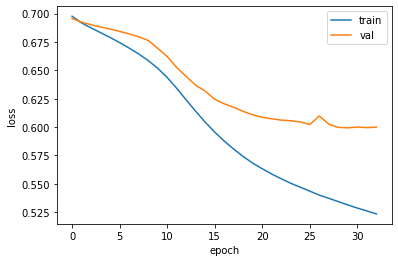

In [ ]:
'''신경 순환망 훈련하기'''
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

# 결과 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()